<a href="https://colab.research.google.com/github/pjohnst5/Image-Segmentation/blob/master/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Training and Validation Data

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root = 'gdrive/\'My Drive\'/474/'
zip_folder = root + 'cityscapes_data.zip'
!unzip $zip_folder

Archive:  gdrive/My Drive/474/cityscapes_data.zip
   creating: cityscapes_data/train/
   creating: cityscapes_data/train/imgs/
   creating: cityscapes_data/train/imgs/src/
  inflating: cityscapes_data/train/imgs/src/aachen_000000_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000001_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000002_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000003_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000004_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000005_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000006_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000007_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000008_000019_leftImg8bit.png  
  inflating: cityscapes_data/train/imgs/src/aachen_000009_000019_leftImg8bit.png 

Define the labels/IDs and a mapping between ID and segmented image color

(from https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py)

In [0]:
from __future__ import print_function, absolute_import, division
from collections import namedtuple

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]


#--------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
#--------------------------------------------------------------------------------

# Please refer to the main method below for example usages!

# name to label object
name2label      = { label.name    : label for label in labels           }
# id to label object
id2label        = { label.id      : label for label in labels           }
# trainId to label object
trainId2label   = { label.trainId : label for label in reversed(labels) }
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]

#--------------------------------------------------------------------------------
# Assure single instance name
#--------------------------------------------------------------------------------

# returns the label name that describes a single instance (if possible)
# e.g.     input     |   output
#        ----------------------
#          car       |   car
#          cargroup  |   car
#          foo       |   None
#          foogroup  |   None
#          skygroup  |   None
def assureSingleInstanceName( name ):
    # if the name is known, it is not a group
    if name in name2label:
        return name
    # test if the name actually denotes a group
    if not name.endswith("group"):
        return None
    # remove group
    name = name[:-len("group")]
    # test if the new name exists
    if not name in name2label:
        return None
    # test if the new name denotes a label that actually has instances
    if not name2label[name].hasInstances:
        return None
    # all good then
    return name

In [0]:
import numpy as np
from matplotlib import pyplot as plt

# takes the resulting predicted ids and makes a segmented color image from it
def idToColorImg(id_array):
  default_color = (255,255,255) # white
  color_array = np.zeros((id_array.shape[0], id_array.shape[1], 3), dtype=int)
  for r in range(id_array.shape[0]):
    for c in range(id_array.shape[1]):
      if id_array[r,c] not in id2label:
        color = default_color
      else:
        color = id2label[id_array[r,c]].color
      color_array[r,c,:] = color

  return color_array

# Make Datasets and Dataloaders

In [0]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision
import os
from PIL import Image


class CityscapeDataset(Dataset):
  def __init__(self, root, isTrain=True):
    post = 'train' if isTrain else 'val'
    self.imgs_folder = torchvision.datasets.ImageFolder(os.path.join(root, post, 'imgs'), transform = transforms.Compose([transforms.Resize((256,512), interpolation=Image.NEAREST)]))
    self.labels_folder = torchvision.datasets.ImageFolder(os.path.join(root, post, 'labels'), transform = transforms.Compose([transforms.Resize((256,512), interpolation=Image.NEAREST)]))
    assert(len(self.imgs_folder) == len(self.labels_folder))

  def __getitem__(self, index):
    img = np.array(self.imgs_folder[index][0], dtype=int)
    label = np.array(self.labels_folder[index][0], dtype=int)
    label = label[:,:,0] # 2d array for IDs (not rgb)

    return img, label

  def __len__(self):
    return len(self.imgs_folder)

In [0]:
# helper function that compares the generated segmentation to the original img
def plotImage(dataset, index):
  raw, ids = dataset[index]
  plt.rcParams['figure.figsize'] = [20,30]
  
  plt.subplot(121)
  plt.imshow(raw)
  plt.xticks([])
  plt.yticks([])
  plt.title("Raw Image")

  plt.subplot(122)
  plt.imshow(idToColorImg(ids))
  plt.xticks([])
  plt.yticks([])
  plt.title("Target Segmented Image")

  plt.show()

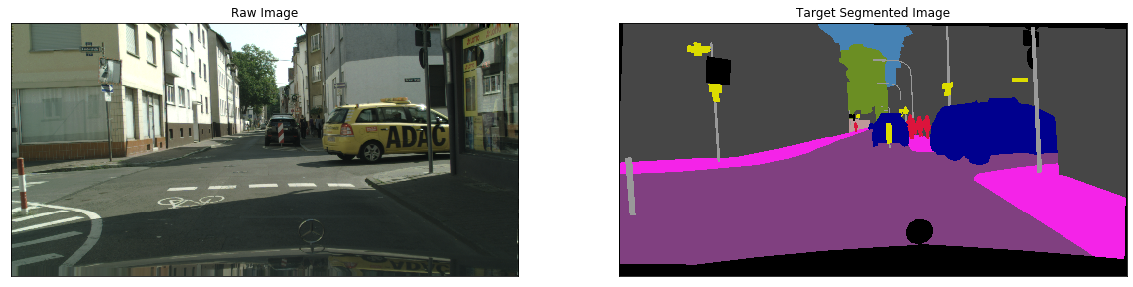

In [0]:
# Plot a sample image and corresponding label (colorized)
val_data = CityscapeDataset('./cityscapes_data', isTrain=False)
plotImage(val_data, 0)

# Define the networks

In [0]:
import torch.nn as nn

class SegmentationNetwork(nn.Module):
  def __init__(self):
    super(SegmentationNetwork, self).__init__()

    self.net = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=25, kernel_size=(3,3), padding=(1,1)),
        nn.Conv2d(in_channels=25, out_channels=50, kernel_size=(3,3), padding=(1,1)),
        nn.ReLU(),
        nn.Conv2d(in_channels=50, out_channels=25, kernel_size=(3,3), padding=(1,1)),
        nn.Conv2d(in_channels=25, out_channels=10, kernel_size=(3,3), padding=(1,1)),
        nn.ReLU(),
        nn.Conv2d(in_channels=10, out_channels=3, kernel_size=(3,3), padding=(1,1)),
        nn.Conv2d(in_channels=3, out_channels=1, kernel_size=(3,3), padding=(1,1)),
    )

    # initialize weights
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.orthogonal_(m.weight)
        nn.init.constant_(m.bias, 0.01)

  def forward(self, x):
    return self.net(x).squeeze(1).round()

In [0]:
class Unet(nn.Module):
  def __init__(self):
    super(Unet, self).__init__()
    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
    self.sigmoid = nn.Sigmoid()
    
    self.block1_in_conv1 = nn.Conv2d(3, 64, (3,3), stride=1, padding=1)
    self.block1_in_conv2 = nn.Conv2d(64, 64, (3,3), stride=1, padding=1)
    
    self.block2_in_conv1 = nn.Conv2d(64, 128, (3,3), stride=1, padding=1)
    self.block2_in_conv2 = nn.Conv2d(128, 128, (3,3), stride=1, padding=1)
    
    self.block3_in_conv1 = nn.Conv2d(128, 256, (3,3), stride=1, padding=1)
    self.block3_in_conv2 = nn.Conv2d(256, 256, (3,3), stride=1, padding=1)
    
    self.block4_in_conv1 = nn.Conv2d(256, 512, (3,3), stride=1, padding=1)
    self.block4_in_conv2 = nn.Conv2d(512, 512, (3,3), stride=1, padding=1)
    
    self.block5_conv1 = nn.Conv2d(512, 1024, (3,3), stride=1, padding=1)
    self.block5_conv2 = nn.Conv2d(1024, 1024, (3,3), stride=1, padding=1)
    
    self.block5_to_4_upconv = nn.ConvTranspose2d(1024, 512, (2,2), stride=2, padding=0)
    
    self.block4_out_conv1 = nn.Conv2d(1024, 512, (3,3), stride=1, padding=1)
    self.block4_out_conv2 = nn.Conv2d(512, 512, (3,3), stride=1, padding=1)
    
    self.block4_to_3_upconv = nn.ConvTranspose2d(512, 256, (2,2), stride=2, padding=0)
    
    self.block3_out_conv1 = nn.Conv2d(512, 256, (3,3), stride=1, padding=1)
    self.block3_out_conv2 = nn.Conv2d(256, 256, (3,3), stride=1, padding=1)
    
    self.block3_to_2_upconv = nn.ConvTranspose2d(256, 128, (2,2), stride=2, padding=0)
    
    self.block2_out_conv1 = nn.Conv2d(256, 128, (3,3), stride=1, padding=1)
    self.block2_out_conv2 = nn.Conv2d(128, 128, (3,3), stride=1, padding=1)
    
    self.block2_to_1_upconv = nn.ConvTranspose2d(128, 64, (2,2), stride=2, padding=0)
    
    self.block1_out_conv1 = nn.Conv2d(128, 64, (3,3), stride=1, padding=1)
    self.block1_out_conv2 = nn.Conv2d(64, 64, (3,3), stride=1, padding=1)
    self.block1_out_conv3 = nn.Conv2d(64, len(id2label), (1,1), stride=1, padding=0)
    
 
  def forward(self, input):
    block1_in_conv1_output = self.relu(self.block1_in_conv1(input))
    block1_in_conv2_output = self.relu(self.block1_in_conv2(block1_in_conv1_output)) # save
    
    block1_to_2_max_output = self.max_pool(block1_in_conv2_output)
    
    block2_in_conv1_output = self.relu(self.block2_in_conv1(block1_to_2_max_output))
    block2_in_conv2_output = self.relu(self.block2_in_conv2(block2_in_conv1_output)) # save
    
    block2_to_3_max_output = self.max_pool(block2_in_conv2_output)
    
    block3_in_conv1_output = self.relu(self.block3_in_conv1(block2_to_3_max_output))
    block3_in_conv2_output = self.relu(self.block3_in_conv2(block3_in_conv1_output)) # save
    
    block3_to_4_max_output = self.max_pool(block3_in_conv2_output)
    
    block4_in_conv1_output = self.relu(self.block4_in_conv1(block3_to_4_max_output))
    block4_in_conv2_output = self.relu(self.block4_in_conv2(block4_in_conv1_output)) # save
    
    block4_to_5_max_output = self.max_pool(block4_in_conv2_output)
    
    block5_conv1_output = self.relu(self.block5_conv1(block4_to_5_max_output))
    block5_conv2_output = self.relu(self.block5_conv2(block5_conv1_output))
    
    block5_to_4_upconv_ouput = self.block5_to_4_upconv(block5_conv2_output)
    
    #concat
    block4_concat_output = torch.cat((block5_to_4_upconv_ouput, block4_in_conv2_output), dim=1)
    
    block4_out_conv1_output = self.relu(self.block4_out_conv1(block4_concat_output))
    block4_out_conv2_output = self.relu(self.block4_out_conv2(block4_out_conv1_output))
    
    block4_to_3_upconv_output = self.block4_to_3_upconv(block4_out_conv2_output)
    
    #concat
    block3_concat_output = torch.cat((block4_to_3_upconv_output, block3_in_conv2_output), dim=1)
    
    block3_out_conv1_output = self.relu(self.block3_out_conv1(block3_concat_output))
    block3_out_conv2_output = self.relu(self.block3_out_conv2(block3_out_conv1_output))
    
    block3_to_2_upconv_output = self.block3_to_2_upconv(block3_out_conv2_output)
    
    #concat
    block2_concat_output = torch.cat((block3_to_2_upconv_output, block2_in_conv2_output), dim=1)
    
    block2_out_conv1_output = self.relu(self.block2_out_conv1(block2_concat_output))
    block2_out_conv2_output = self.relu(self.block2_out_conv2(block2_out_conv1_output))
    
    block2_to_1_upconv_output = self.block2_to_1_upconv(block2_out_conv2_output)
    
    #concat
    block1_concat_output = torch.cat((block2_to_1_upconv_output, block1_in_conv2_output), dim=1)
    
    block1_out_conv1_output = self.relu(self.block1_out_conv1(block1_concat_output))
    block1_out_conv2_output = self.relu(self.block1_out_conv2(block1_out_conv1_output))
    block1_out_conv3_output = self.relu(self.block1_out_conv3(block1_out_conv2_output))
    
    return block1_out_conv3_output

In [0]:
import torch.nn as nn
from torchvision.models import resnet

# Link net
class InitBlock(nn.Module):
  def __init__(self):
    super(InitBlock, self).__init__()
    self.conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7,7), stride=2, padding=(3,3))
    self.bn = nn.BatchNorm2d(64)
    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=(3,3), stride=2, padding=(1,1)) 

  def forward(self, x):
    x_hat = self.conv(x)
    x_hat = self.bn(x_hat)
    x_hat = self.relu(x_hat)
    return self.max_pool(x_hat)

class Decoder(nn.Module):
  def __init__(self, m, n, kernel_size, stride, padding, output_padding):
    super(Decoder, self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(in_channels=m, out_channels=m//4, kernel_size=(1,1), stride=1, padding=0),
        nn.BatchNorm2d(m//4),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=m//4, out_channels=m//4, kernel_size=kernel_size, stride=stride, padding=padding, output_padding=output_padding),
        nn.BatchNorm2d(m//4),
        nn.ReLU(),
        nn.Conv2d(in_channels=m//4, out_channels=n, kernel_size=(1,1), stride=1, padding=0),
        nn.BatchNorm2d(n),
        nn.ReLU()
    )

  def forward(self, x):
    return self.net(x)

class OutBlock(nn.Module):
  def __init__(self, n):
    super(OutBlock, self).__init__()
    self.net = nn.Sequential(
        nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=(3,3), stride=2, padding=1, output_padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3,3), stride=1, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=32, out_channels=n, kernel_size=(2,2), stride=2),
        nn.BatchNorm2d(n),
        nn.ReLU()
    )

  def forward(self, x):
    return self.net(x)

class LinkNet(nn.Module):
  def __init__(self):
    super(LinkNet, self).__init__()
    base = resnet.resnet18(pretrained=True)

    self.init_block = InitBlock()

    self.encoder1 = base.layer1
    self.encoder2 = base.layer2
    self.encoder3 = base.layer3
    self.encoder4 = base.layer4

    self.decoder1 = Decoder(64, 64, 3, 1, 1, 0)
    self.decoder2 = Decoder(128, 64, 3, 2, 1, 1)
    self.decoder3 = Decoder(256, 128, 3, 2, 1, 1)
    self.decoder4 = Decoder(512, 256, 3, 2, 1, 1)

    self.out = OutBlock(1)


  def forward(self, x):
    x_hat = self.init_block(x)
    e1 = self.encoder1(x_hat)
    e2 = self.encoder2(e1)
    e3 = self.encoder3(e2)
    e4 = self.encoder4(e3)

    d4 = e3 + self.decoder4(e4)
    d3 = e2 + self.decoder3(d4)
    d2 = e1 + self.decoder2(d3)
    d1 = self.decoder1(d2)

    return self.out(d1).squeeze(1).round()

# Train Model

In [0]:
from tqdm import tqdm
import torch.optim as optim
import torch

import gc
from IPython.core.ultratb import AutoFormattedTB
__ITB__ = AutoFormattedTB(mode = 'Verbose',color_scheme='LightBg', tb_offset = 1)

def get_accuracy(output, target):
  matchings = output == target
  accuracy = torch.mean(matchings.double())
  return accuracy.item()

# custom loss function, which is simply the percent of different pixels between
# the predicted IDs and true IDs
# https://discuss.pytorch.org/t/custom-loss-functions/29387
def my_loss(output, target):
  # diffs = torch.abs(output - target)
  # loss = torch.mean(diffs.double())
  
  diffs = output != target
  loss = torch.mean(diffs.double())
  loss.requires_grad_(True)
  return loss

def train(num_epochs, my_batch_size):
  try:
    train_losses = []
    train_accuracies = []
    train_data = CityscapeDataset('./cityscapes_data', isTrain=True)
    val_data = CityscapeDataset('./cityscapes_data', isTrain=False)

    train_loader = DataLoader(train_data,
                              batch_size=my_batch_size,
                              shuffle=True,
                              num_workers=4,
                              pin_memory=True)
    validation_loader = DataLoader(val_data,
                              batch_size=my_batch_size,
                              shuffle=False,
                              num_workers=4,
                              pin_memory=True)
    model = Unet()
    # model = LinkNet()
    # model = SegmentationNetwork()
    model.cuda()

    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.CrossEntropyLoss()

    loop = tqdm(total=len(train_loader) * num_epochs, position=0)
    for epoch in range(num_epochs):
      for x, y_truth in train_loader:
        x, y_truth = x.type(torch.cuda.FloatTensor), y_truth.type(torch.cuda.FloatTensor)
        x = x.permute(0,3,1,2)  # channels comes after batch dimension in pytorch
        
        optimizer.zero_grad()
        y_hat = model(x)
        
        loss = objective(y_hat, y_truth.long())
        # loss = my_loss(y_hat, y_truth)
        train_losses.append(loss)
        loss.backward()

        if isinstance(model, Unet):
          y_hat = torch.argmax(y_hat, dim=1)
        
        accuracy = get_accuracy(y_hat, y_truth)
        train_accuracies.append(accuracy)
        
        loop.set_description('loss:{:.4f}, accuracy:{:.4f}'.format(loss.item(), accuracy))

        optimizer.step()

        loop.update(1)
    loop.close()

    return model, train_losses, train_accuracies
  except:
    __ITB__()

In [0]:
gc.collect()

num_training_epochs = 150
batch_size = 5

trained_model, train_losses, train_accuracies = train(num_training_epochs, batch_size)

gc.collect()

loss:0.0901, accuracy:0.9707: 100%|██████████| 8100/8100 [1:00:17<00:00,  2.91it/s]


0

# Results

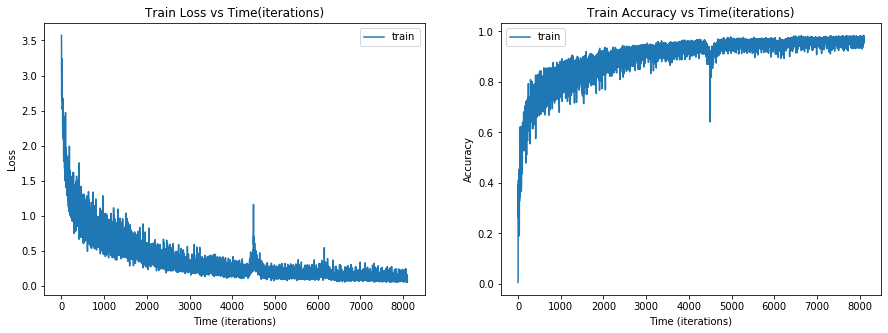

In [0]:
plt.rcParams['figure.figsize'] = [15,5]
plt.subplot(121)
plt.title("Train Loss vs Time(iterations)")
plt.xlabel("Time (iterations)")
plt.ylabel("Loss")
plt.plot(train_losses, label='train')
plt.legend()

plt.subplot(122)
plt.title("Train Accuracy vs Time(iterations)")
plt.xlabel("Time (iterations)")
plt.ylabel("Accuracy")
plt.plot(train_accuracies, label='train')
plt.legend()

plt.show()
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [0]:
val_losses = []
val_accuracies = []

optimizer = optim.Adam(trained_model.parameters(), lr=1e-4)
objective = nn.CrossEntropyLoss()

val_loader = DataLoader(val_data,
                              batch_size=5,
                              shuffle=False,
                              num_workers=4,
                              pin_memory=True)

for x, y_truth in val_loader:
    x, y_truth = x.type(torch.cuda.FloatTensor), y_truth.type(torch.cuda.FloatTensor)
    x = x.permute(0,3,1,2)  # channels comes after batch dimension in pytorch
    
    optimizer.zero_grad()
    y_hat = trained_model(x)
    
    loss = objective(y_hat, y_truth.long())
    # loss = my_loss(y_hat, y_truth)
    val_losses.append(loss)
    loss.backward()

    if isinstance(trained_model, Unet):
      y_hat = torch.argmax(y_hat, dim=1)
    
    accuracy = get_accuracy(y_hat, y_truth)
    val_accuracies.append(accuracy)

    optimizer.step()

print("Final Average Validation Loss:", sum(val_losses) / len(val_losses))
print("Final Average Validation Accuracy:", sum(val_accuracies) / len(val_accuracies))

Final Average Validation Loss: tensor(1.0566, device='cuda:0', grad_fn=<DivBackward0>)
Final Average Validation Accuracy: 0.7469300696869022


In [0]:
def predict(raw, model):
  x = raw
  x = torch.from_numpy(x).float().cuda()
  x = x.permute(2,0,1)  # channels comes after batch dimension in pytorch
  x = x.unsqueeze(0) # add a "batch" dimension
  y_hat = trained_model(x)
  if isinstance(model, Unet):
    y_hat = torch.argmax(y_hat, dim=1)
  y_hat = y_hat.squeeze(0).cpu().detach().numpy()
  return idToColorImg(y_hat)

In [0]:
def plotResults(trained_model, dataset, num_imgs):
  plt.rcParams['figure.figsize'] = [20,20]
  rand_indexes = np.random.randint(low=0, high=len(dataset), size=(num_imgs))

  for r,v in enumerate(rand_indexes):
    raw, ids = dataset[v]

    plt.subplot(num_imgs,3,3*r + 1)
    plt.imshow(raw)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(num_imgs,3,3*r + 2)
    plt.imshow(idToColorImg(ids))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(num_imgs,3,3*r + 3)
    plt.imshow(predict(raw, trained_model))
    plt.xticks([])
    plt.yticks([])
    plt.show()
  plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [0]:
def saveArray(array, root, file_name):
  np.save(file_name, array)
  temp = root + file_name + '.npy'
  !rm -f $temp
  !mv {file_name}.npy $root

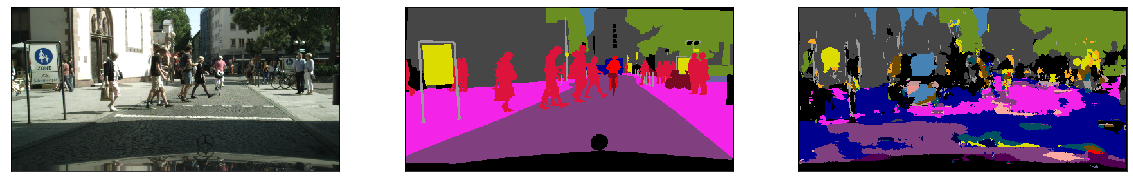

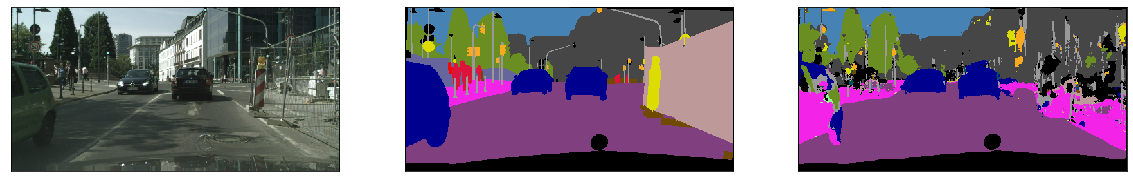

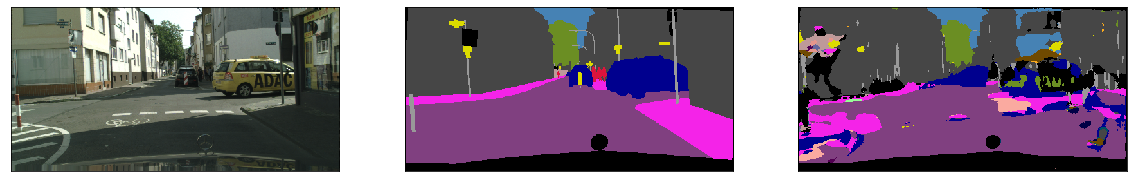

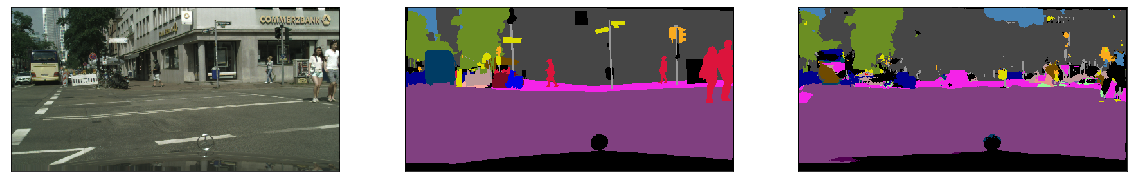

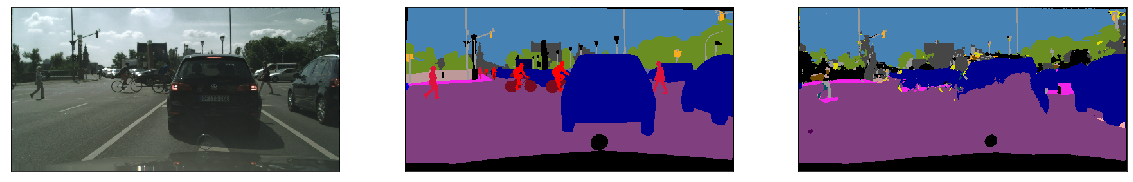

In [0]:
plotResults(trained_model, val_data, 5)
pred = predict(val_data[0][0], trained_model)
saveArray(pred, root, 'unet_150_ce_bigger_dataset')

# Different networks and loss functions shown in chronological order of testing


In [0]:
def plotSingleRow(dataset, index, pred, pred_title):
  plt.rcParams['figure.figsize'] = [20,20]
  raw, ids = dataset[index]
  plt.subplot(131)
  plt.title("Raw Image")
  plt.imshow(raw)
  plt.xticks([])
  plt.yticks([])

  plt.subplot(132)
  plt.title("Label")
  plt.imshow(idToColorImg(ids))
  plt.xticks([])
  plt.yticks([])

  plt.subplot(133)
  plt.title(pred_title)
  plt.imshow(pred)
  plt.xticks([])
  plt.yticks([])
  plt.show()
  plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [0]:
def loadArray(root, file_name):
  path = root + file_name
  !cp {path}.npy ./
  arr = np.load(file_name + '.npy')
  return arr

# Segmentation Network Results

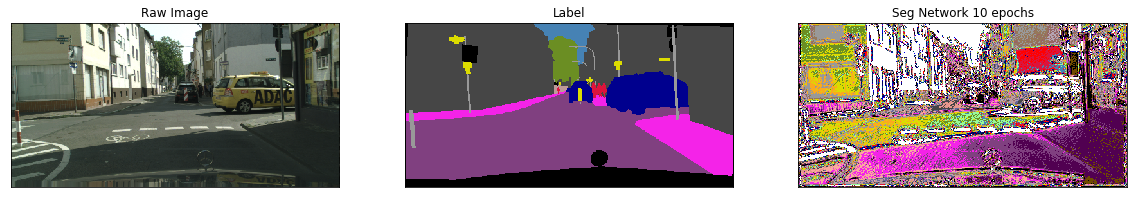

In [0]:
pred = loadArray(root, 'segmented_10_diff_loss')
plotSingleRow(val_data, 0, pred, 'Seg Network 10 epochs')

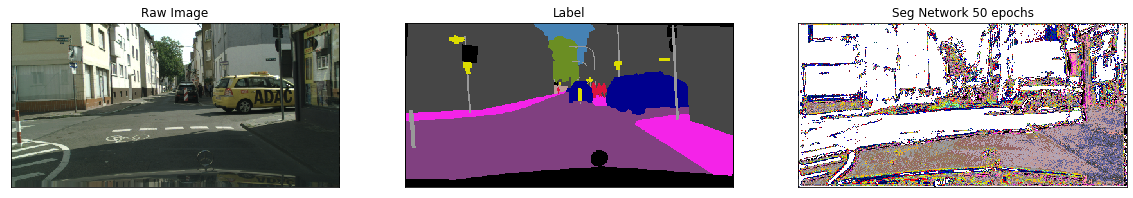

In [0]:
pred = loadArray(root, 'segmented_50_diff_loss')
plotSingleRow(val_data, 0, pred, 'Seg Network 50 epochs')

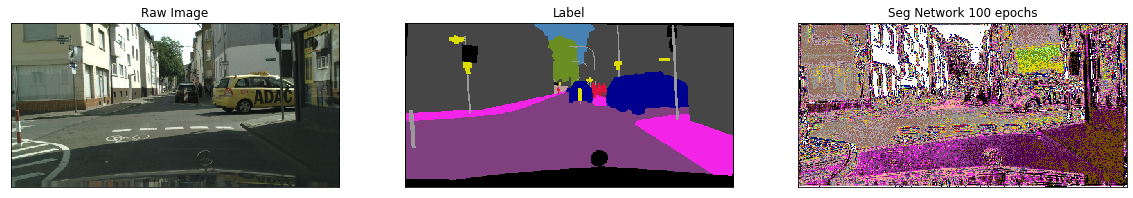

In [0]:
pred = loadArray(root, 'segmented_100_diff_loss')
plotSingleRow(val_data, 0, pred, 'Seg Network 100 epochs')

#Unet results

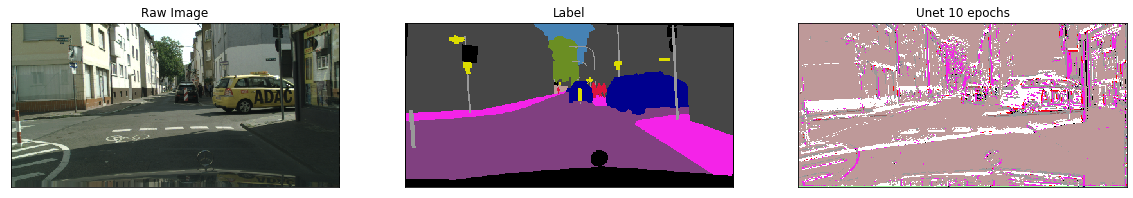

In [0]:
pred = loadArray(root, 'unet_10')
plotSingleRow(val_data, 0, pred, 'Unet 10 epochs')

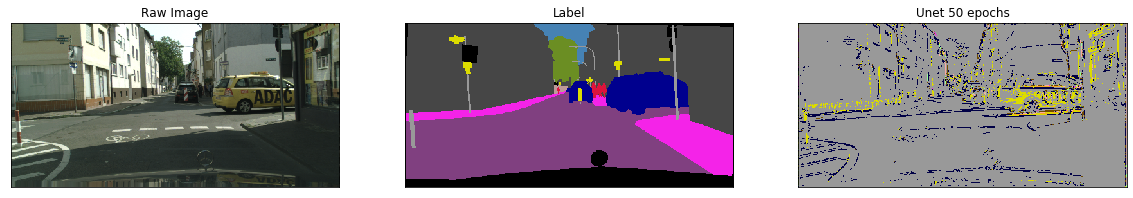

In [0]:
pred = loadArray(root, 'unet_50')
plotSingleRow(val_data, 0, pred, 'Unet 50 epochs')

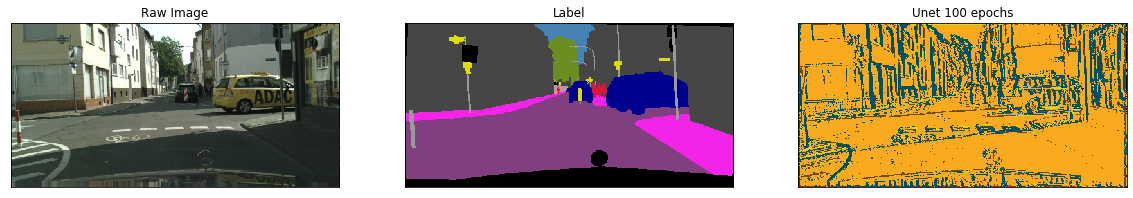

In [0]:
pred = loadArray(root, 'unet_100')
plotSingleRow(val_data, 0, pred, 'Unet 100 epochs')

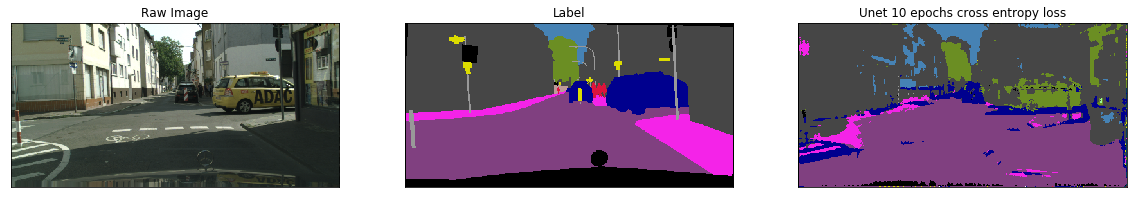

In [0]:
pred = loadArray(root, 'unet_10_ce')
plotSingleRow(val_data, 0, pred, 'Unet 10 epochs cross entropy loss')

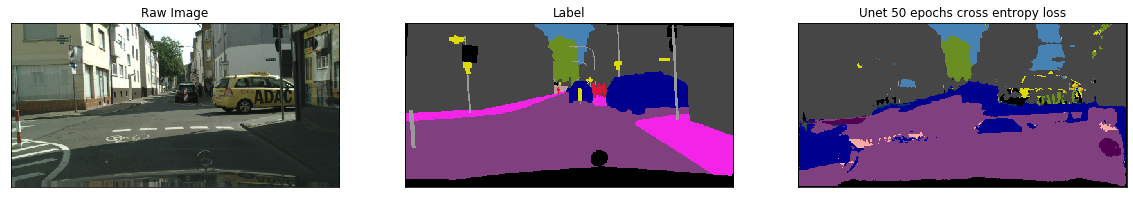

In [0]:
pred = loadArray(root, 'unet_50_ce')
plotSingleRow(val_data, 0, pred, 'Unet 50 epochs cross entropy loss')

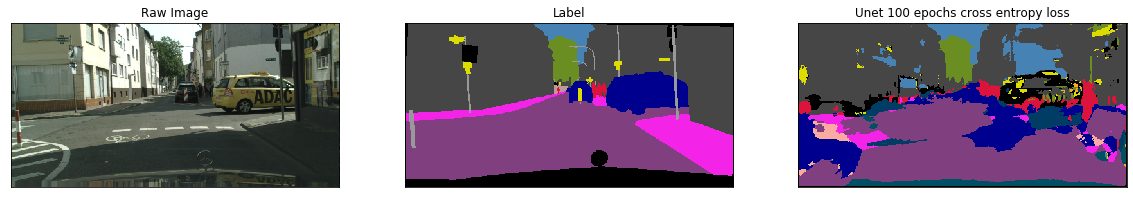

In [0]:
pred = loadArray(root, 'unet_100_ce')
plotSingleRow(val_data, 0, pred, 'Unet 100 epochs cross entropy loss')

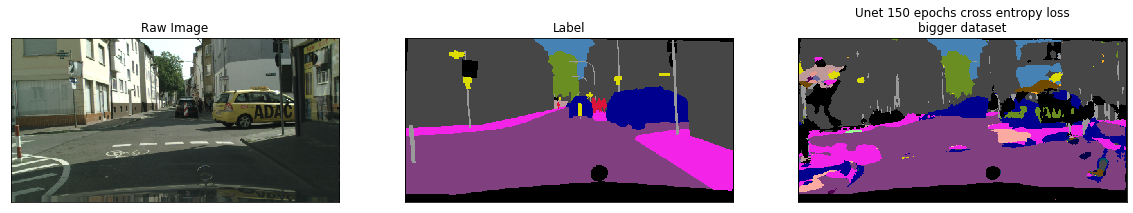

In [0]:
pred = loadArray(root, 'unet_150_ce_bigger_dataset')
plotSingleRow(val_data, 0, pred, 'Unet 150 epochs cross entropy loss\nbigger dataset')